In [1]:
%load_ext autoreload
%autoreload 2

from emeraldprocessing.tem.dataIO import readSkyTEMxyz
from emeraldprocessing.tem.utils import splitData_lines
from emeraldprocessing.tem.plotting import dataQCplot
from emeraldprocessing.tem.utils import scaleData
from emeraldprocessing.tem.culling import cullData

In [2]:
data, gex  = readSkyTEMxyz('../../demo_data/Demo.xyz',
                           '../../demo_data/SkyTEM_LMZ_HMZ_STD_demo.alc',
                           '../../demo_data/Demo.gex')

------- reading SkyTEM xyz data --------------
reading gex file ....
header [General] parsed
header [Channel1] parsed
header [Channel2] parsed
reading xyz file ...
build xyz dictionary .....
.... done!


/Users/mp/Python/libaarhusxyz_public/libaarhusxyz/alc.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(nameorfile, sep="= *", header=None).rename(columns={0:"canonical_name", 1:"position"})
/Users/mp/Python/EmeraldProcessing/emeraldprocessing/tem/dataIO.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['flightlines']['DipoleMoment_Ch01']=gex["General"]["NumberOfTurnsLM"] * gex["General"]["TxLoopArea"] * Data['flightlines']['Current_Ch01']
/Users/mp/Python/EmeraldProcessing/emeraldprocessing/tem/dataIO.py:37: SettingWithCopyWarn

In [12]:
data['flightlines'].columns

Index(['fid', 'Line', 'flight', 'Date', 'Time', 'TxPitch', 'TxRoll',
       'TxAltitude', 'Misc1 ', 'lon', 'lat', 'UTMX', 'UTMY', 'Topography',
       'alt', 'gdspeed', 'rmf', 'Magnetic', 'PowerLineMonitor', 'Misc2',
       'Current_Ch02', 'Current_Ch01', 'DipoleMoment_Ch01',
       'DipoleMoment_Ch02', 'cull_reason', 'coverage', 'TxZ'],
      dtype='object')

In [3]:
scaleData(data)

In [4]:
cullData(data)

In [5]:
Lines=splitData_lines(data, line_key='Line')

In [6]:
data['layer_data'].keys()

dict_keys(['Gate_Ch01', 'Gate_Ch02', 'STD_Ch01', 'STD_Ch02', 'InUse_Ch01', 'InUse_Ch02', 'Gate_scaled_Ch01', 'Gate_scaled_Ch02', 'Gate_culled_Ch01', 'Gate_scaled_culled_Ch01', 'STD_culled_Ch01', 'Gate_culled_Ch02', 'Gate_scaled_culled_Ch02', 'STD_culled_Ch02'])

In [7]:
data['layer_data']['STD_Ch01']

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,NaN,0.002527,0.002146,0.015112,0.002977,0.004503,0.004866,0.004161,0.004178,0.004166,...,0.004894,0.005278,0.005522,0.005880,0.007255,0.008951,0.013301,0.021396,0.035144,0.064309
1,NaN,0.002657,0.002304,0.010770,0.003009,0.004613,0.004988,0.004356,0.004301,0.004403,...,0.004745,0.005480,0.005789,0.006436,0.008506,0.010611,0.016611,0.028488,0.050207,0.104771
2,NaN,0.002825,0.002492,0.008392,0.003075,0.004707,0.005093,0.004579,0.004444,0.004525,...,0.004843,0.005839,0.006732,0.008080,0.011357,0.015600,0.024103,0.043332,0.079172,0.175445
3,NaN,0.003094,0.002798,0.006852,0.003153,0.004693,0.005159,0.004557,0.004417,0.004396,...,0.005579,0.007481,0.009409,0.011836,0.017651,0.026892,0.042954,0.076325,0.149843,0.421019
4,NaN,0.003400,0.003202,0.005303,0.002975,0.004302,0.004791,0.004117,0.004058,0.004039,...,0.008494,0.011929,0.016372,0.021379,0.030755,0.052891,0.097852,0.157995,0.366394,15.121300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,0.006332,0.013687,0.002317,0.004489,0.010611,0.017185,0.019993,0.024255,0.038878,...,0.126668,0.201636,0.344733,0.436237,0.454524,0.527641,0.676186,0.950762,1.301480,1.679660
337,NaN,0.006639,0.014273,0.002863,0.006507,0.012914,0.016460,0.016307,0.018703,0.027957,...,0.101032,0.154303,0.447042,0.387516,0.281119,0.497266,0.539164,0.923845,0.837998,0.507440
338,NaN,0.007070,0.013864,0.003658,0.008319,0.014457,0.015204,0.013208,0.015092,0.020419,...,0.087803,0.126961,0.385357,0.292854,0.233020,0.528221,0.368416,0.815954,0.685865,0.337056
339,NaN,0.007657,0.012943,0.004205,0.008673,0.014788,0.014192,0.011990,0.013413,0.016529,...,0.078227,0.141775,0.216772,0.228875,0.208172,0.343161,0.287238,0.571353,0.560784,0.335178


In [8]:
gex['Channel2']

{'RxCoilNumber': 1.0,
 'GateTimeShift': -1.85e-06,
 'GateFactor': 1.0,
 'SystemResponseConvolution': 0.0,
 'RemoveInitialGates': 10.0,
 'PrimaryFieldDampingFactor': 0.01,
 'UniformDataSTD': 0.03,
 'MeaTimeDelay': 3e-05,
 'NoGates': 32.0,
 'RepFreq': 75.0,
 'FrontGateTime': 5e-05,
 'TiBLowPassFilter': array([1.e+00, 5.e+05]),
 'TransmitterMoment': 'HM',
 'TxApproximateCurrent': 110.0,
 'ReceiverPolarizationXYZ': 'Z',
 'ApproxDipoleMoment': 150480.0}

plotting culled data
plotting culled data


/Users/mp/Python/EmeraldProcessing/venvEMProcessing/lib/python3.9/site-packages/matplotlib/axes/_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


plotting culled data
plotting culled data


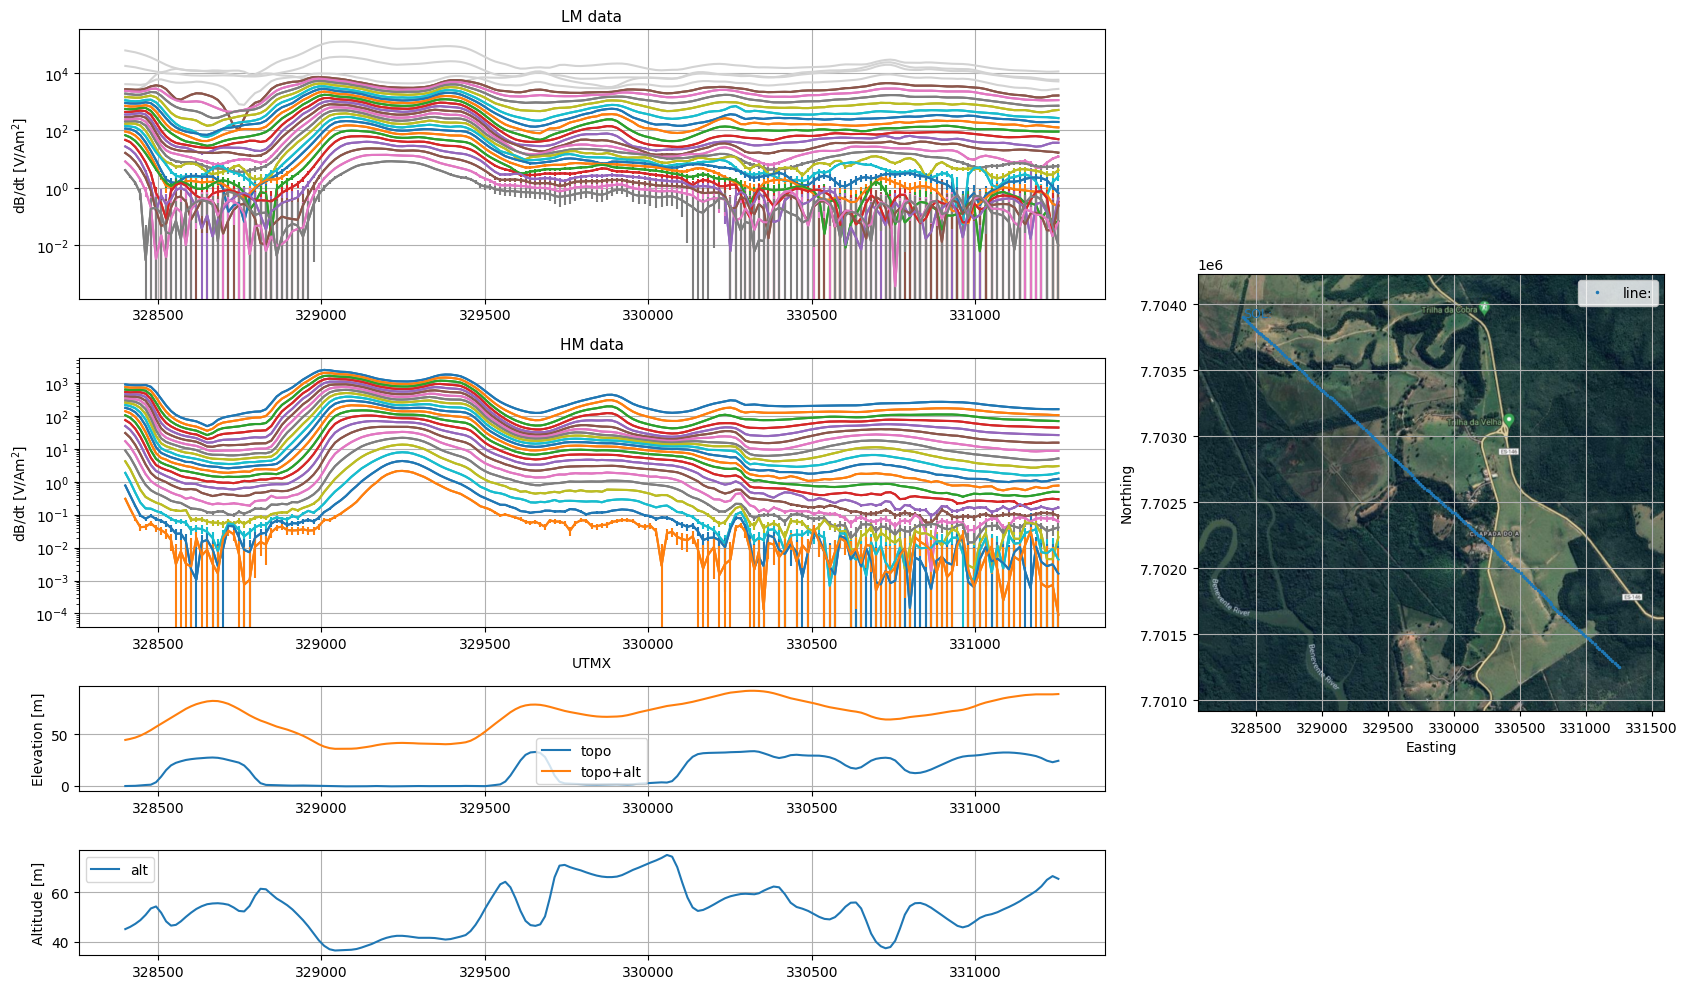

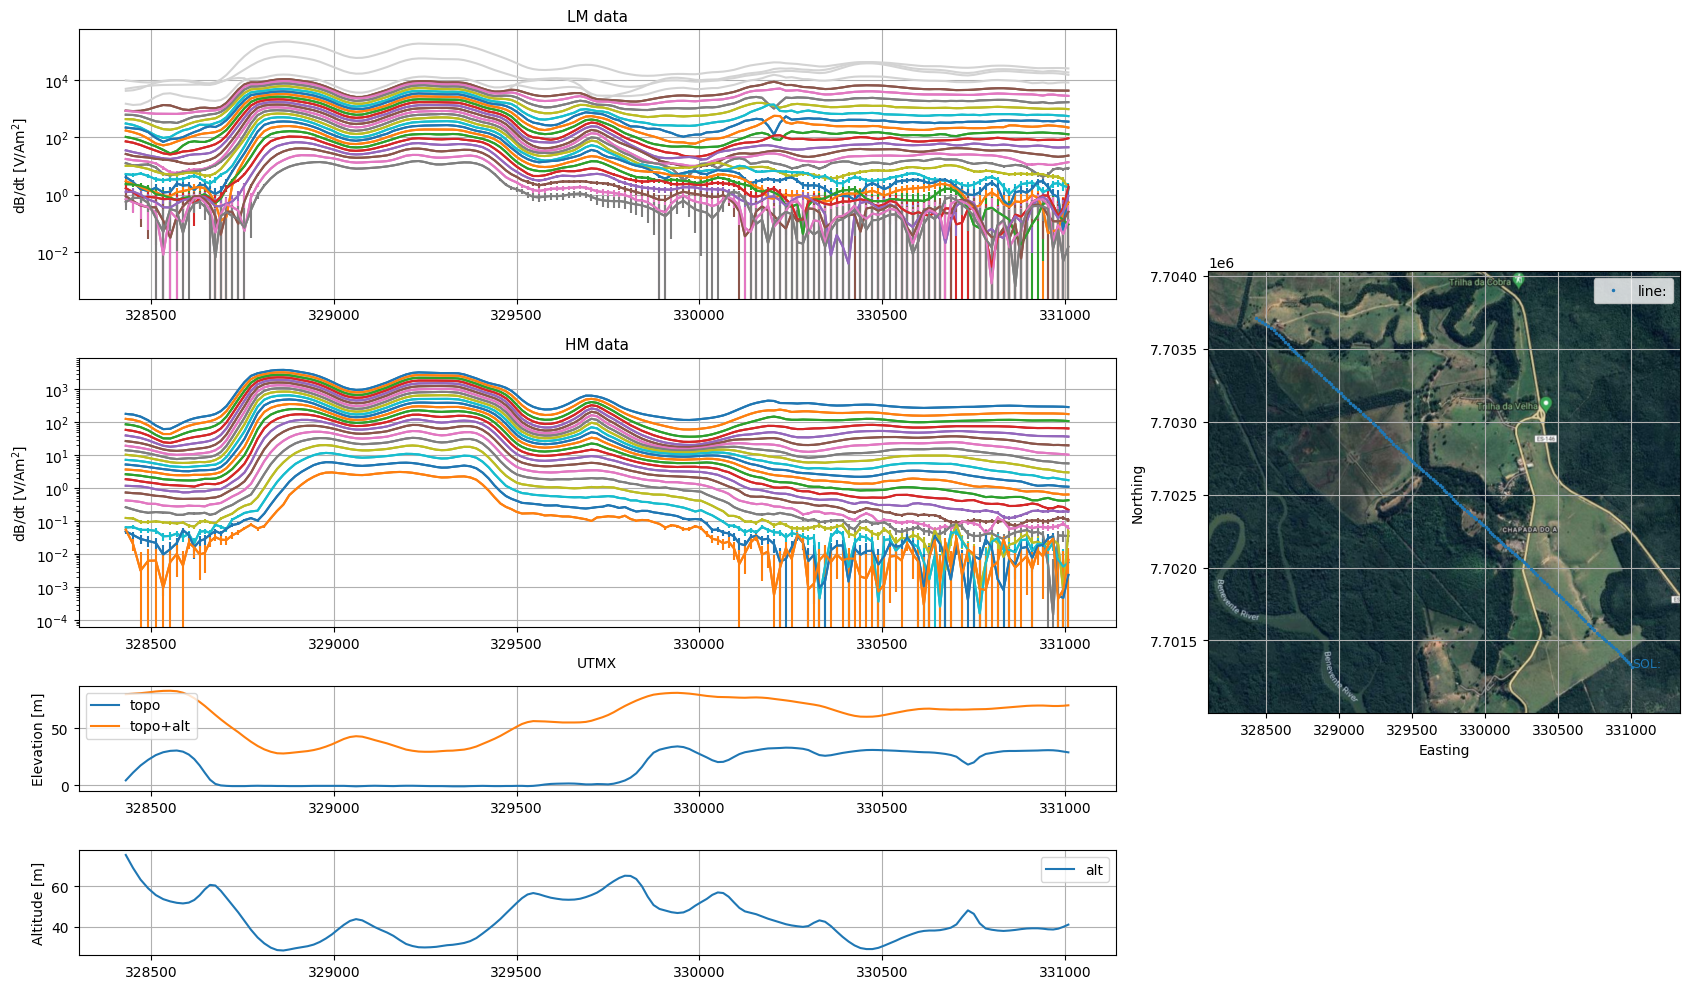

In [9]:
for line in Lines.keys():
    dataQCplot(Lines[line], 
               crs=31984, 
               basemap='http://mt0.google.com/vt/lyrs=y&hl=en&x={x}&y={y}&z={z}',
               plot_scaled=True,
               xkey='UTMX',
               plotSTD=True)
    

In [10]:
data['layer_data']['Gate_Ch02'].iloc[0]

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10    905.068000
11    753.939000
12    631.725000
13    532.165000
14    453.553000
15    390.433000
16    338.959000
17    294.440000
18    253.438000
19    214.132000
20    175.844000
21    138.796000
22    104.338000
23     74.306600
24     49.259700
25     30.162300
26     17.040700
27      8.893900
28      4.188000
29      1.855590
30      0.767669
31      0.303630
Name: 0, dtype: float64